## IPL Cricket Score Predictor

IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import keras 
import tensorflow as tf


LOAD THE IPL DATASET

In [2]:
ipl = pd.read_csv(r"C:\Users\yalla\OneDrive\Desktop\PracticalAI\CourseAssets\ipl_data.csv")
ipl.head()


,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,1,0,0.1,1,0,0,0,222
1,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,1,0,0.2,1,0,0,0,222
2,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.2,2,0,0,0,222
3,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.3,2,0,0,0,222
4,1,2008-04-18,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,2,0,0.4,2,0,0,0,222


DROP UNIMPORTANT FEATURES

In [3]:
df = ipl.drop(['date', 'runs', 'wickets', 'overs', 'runs_last_5', 'wickets_last_5','mid', 'striker', 'non-striker'], axis =1)


MORE PRE-PROCESSING

In [4]:
X = df.drop(['total'], axis =1)
y = df['total']


LABEL ENCODING

In [5]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object for each categorical feature
venue_encoder = LabelEncoder()
batting_team_encoder = LabelEncoder()
bowling_team_encoder = LabelEncoder()
striker_encoder = LabelEncoder()
bowler_encoder = LabelEncoder()

# Fit and transform the categorical features with label encoding
X['venue'] = venue_encoder.fit_transform(X['venue'])
X['bat_team'] = batting_team_encoder.fit_transform(X['bat_team'])
X['bowl_team'] = bowling_team_encoder.fit_transform(X['bowl_team'])
X['batsman'] = striker_encoder.fit_transform(X['batsman'])
X['bowler'] = bowler_encoder.fit_transform(X['bowler'])

print(X)


       venue  bat_team  bowl_team  batsman  bowler
0         14         6         12      328     201
1         14         6         12       61     201
2         14         6         12       61     201
3         14         6         12       61     201
4         14         6         12       61     201
...      ...       ...        ...      ...     ...
76009     23         7         10      172      96
76010     23         7         10      172      96
76011     23         7         10      172      96
76012     23         7         10      215      96
76013     23         7         10      172      96

[76014 rows x 5 columns]


SPLIT DATA INTO TRAINING & TEST SETS

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


FEATURE SCALING

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


DEFINE THE NEURAL NETWORK

In [8]:
# Define the neural network model
model = keras.Sequential([
    keras.layers.Input( shape=(X_train_scaled.shape[1],)),  # Input layer
    keras.layers.Dense(512, activation='relu'),  # Hidden layer with 512 units and ReLU activation
    keras.layers.Dense(216, activation='relu'),  # Hidden layer with 216 units and ReLU activation
    keras.layers.Dense(1, activation='linear')  # Output layer with linear activation for regression
])

# Compile the model with Huber loss
huber_loss = tf.keras.losses.Huber(delta=1.0)  # You can adjust the 'delta' parameter as needed
model.compile(optimizer='adam', loss=huber_loss)  # Use Huber loss for regression


TRAIN THE MODEL

In [9]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=64, validation_data=(X_test_scaled, y_test))


Epoch 1/50
832/832 [==============================] - 2s 1ms/step - loss: 32.6484 - val_loss: 22.1472
Epoch 2/50
832/832 [==============================] - 1s 1ms/step - loss: 22.3633 - val_loss: 22.1205
Epoch 3/50
832/832 [==============================] - 1s 1ms/step - loss: 22.2783 - val_loss: 22.0174
Epoch 4/50
832/832 [==============================] - 1s 1ms/step - loss: 22.2577 - val_loss: 21.9387
Epoch 5/50
832/832 [==============================] - 1s 2ms/step - loss: 22.2429 - val_loss: 21.9321
Epoch 6/50
832/832 [==============================] - 1s 2ms/step - loss: 22.2303 - val_loss: 21.8983
Epoch 7/50
832/832 [==============================] - 1s 2ms/step - loss: 22.1674 - val_loss: 22.1848
Epoch 8/50
832/832 [==============================] - 1s 2ms/step - loss: 22.2011 - val_loss: 22.1745
Epoch 9/50
832/832 [==============================] - 1s 2ms/step - loss: 22.1449 - val_loss: 21.8626
Epoch 10/50
832/832 [==============================] - 1s 1ms/step - loss: 22.1373

MODEL EVALUATION

In [10]:
# Make predictions
predictions = model.predict(X_test_scaled)

from sklearn.metrics import mean_absolute_error,mean_squared_error
mean_absolute_error(y_test,predictions)
mean_squared_error(y_test,predictions)


713/713 [==============================] - 0s 599us/step


754.6867065429688

TEST THE MODEL

In [11]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings("ignore")

# Widgets for user input
venue = widgets.Dropdown(options=df['venue'].unique().tolist(), description='Select Venue:', value="Punjab Cricket Association IS Bindra Stadium, Mohali")
batting_team = widgets.Dropdown(options=df['bat_team'].unique().tolist(), description='Select Batting Team:', value="Chennai Super Kings")
bowling_team = widgets.Dropdown(options=df['bowl_team'].unique().tolist(), description='Select Bowling Team:', value="Kings XI Punjab")
striker = widgets.Dropdown(options=df['batsman'].unique().tolist(), description='Select Striker:', value="SC Ganguly")
bowler = widgets.Dropdown(options=df['bowler'].unique().tolist(), description='Select Bowler:', value="P Kumar")

predict_button = widgets.Button(description="Predict Score")
output = widgets.Output()

def predict_score(b):
    with output:
        clear_output()  # Clear previous output inside the output widget only

        # Transform values
        decoded_venue = venue_encoder.transform([venue.value])
        decoded_batting_team = batting_team_encoder.transform([batting_team.value])
        decoded_bowling_team = bowling_team_encoder.transform([bowling_team.value])
        decoded_striker = striker_encoder.transform([striker.value])
        decoded_bowler = bowler_encoder.transform([bowler.value])

        # Prepare input
        input_arr = np.array([decoded_venue, decoded_batting_team, decoded_bowling_team, decoded_striker, decoded_bowler])
        input_arr = input_arr.reshape(1, 5)
        input_scaled = scaler.transform(input_arr)

        # Predict
        predicted_score = model.predict(input_scaled)
        predicted_score = int(predicted_score[0, 0])

        print(f"{batting_team.value} are predicted to score {predicted_score} runs against {bowling_team.value}")

predict_button.on_click(predict_score)

# Display everything
display(venue, batting_team, bowling_team, striker, bowler, predict_button, output)


Dropdown(description='Select Venue:', index=32, options=('M Chinnaswamy Stadium', 'Punjab Cricket Association …

Dropdown(description='Select Batting Team:', index=1, options=('Kolkata Knight Riders', 'Chennai Super Kings',…

Dropdown(description='Select Bowling Team:', index=1, options=('Royal Challengers Bangalore', 'Kings XI Punjab…

Dropdown(description='Select Striker:', options=('SC Ganguly', 'BB McCullum', 'RT Ponting', 'DJ Hussey', 'Moha…

Dropdown(description='Select Bowler:', options=('P Kumar', 'Z Khan', 'AA Noffke', 'JH Kallis', 'SB Joshi', 'CL…

Button(description='Predict Score', style=ButtonStyle())

Output()

In [12]:
%matplotlib inline


In [13]:
print(df.columns)


Index(['venue', 'bat_team', 'bowl_team', 'batsman', 'bowler', 'total'], dtype='object')


In [14]:
# 📌 Required imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Inline plots
%matplotlib inline

# 👁️ Show first few rows (optional)
df.head()



,venue,bat_team,bowl_team,batsman,bowler,total
0,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,SC Ganguly,P Kumar,222
1,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
2,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
3,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222
4,M Chinnaswamy Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,BB McCullum,P Kumar,222


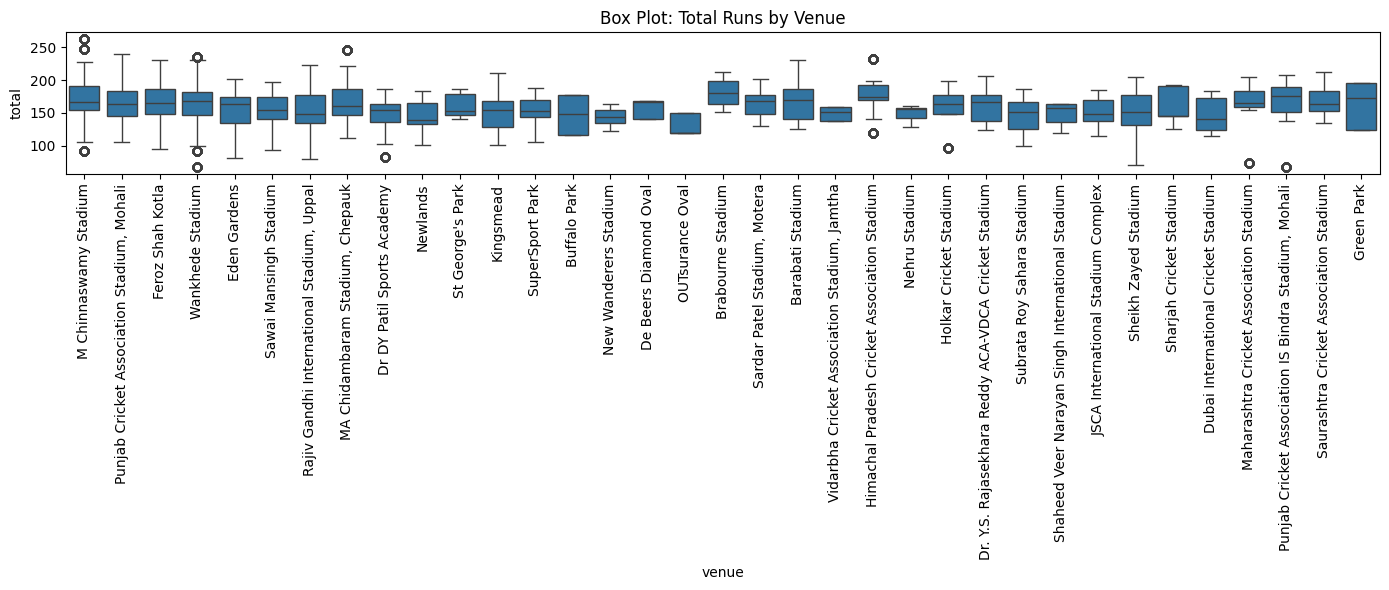

In [15]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df, x='venue', y='total')
plt.title("Box Plot: Total Runs by Venue")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


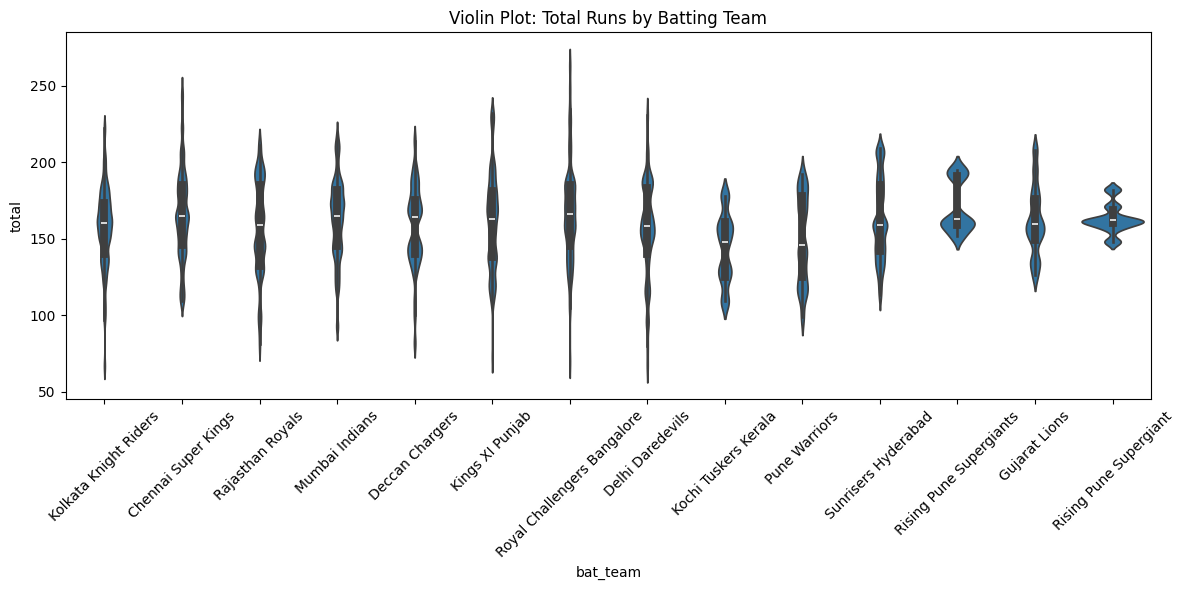

In [16]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='bat_team', y='total')
plt.title("Violin Plot: Total Runs by Batting Team")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


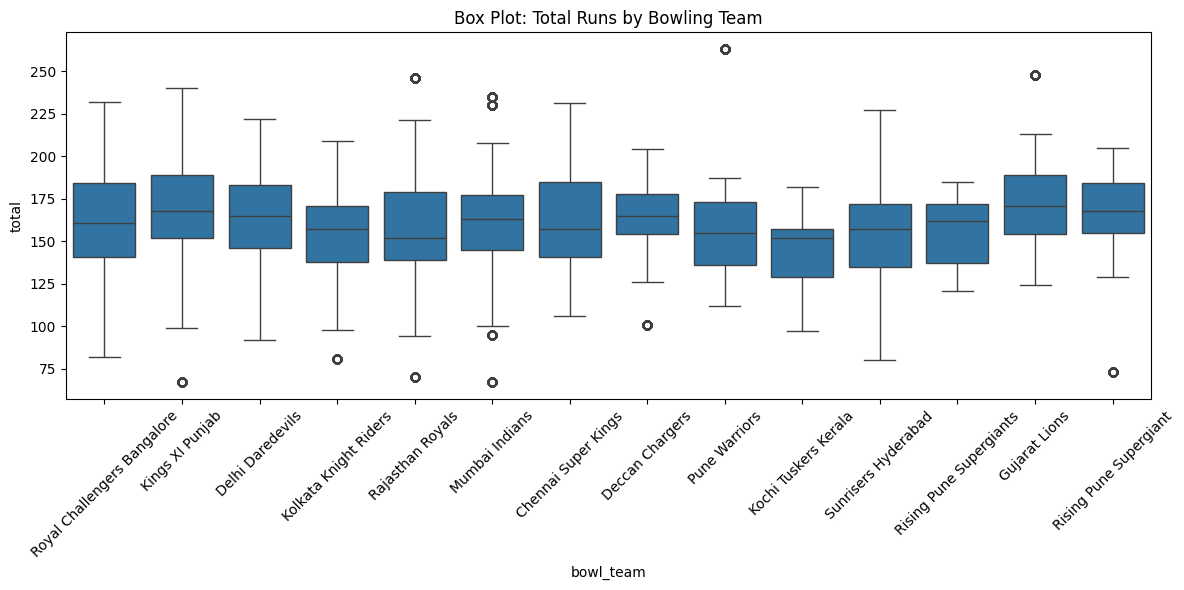

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='bowl_team', y='total')
plt.title("Box Plot: Total Runs by Bowling Team")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


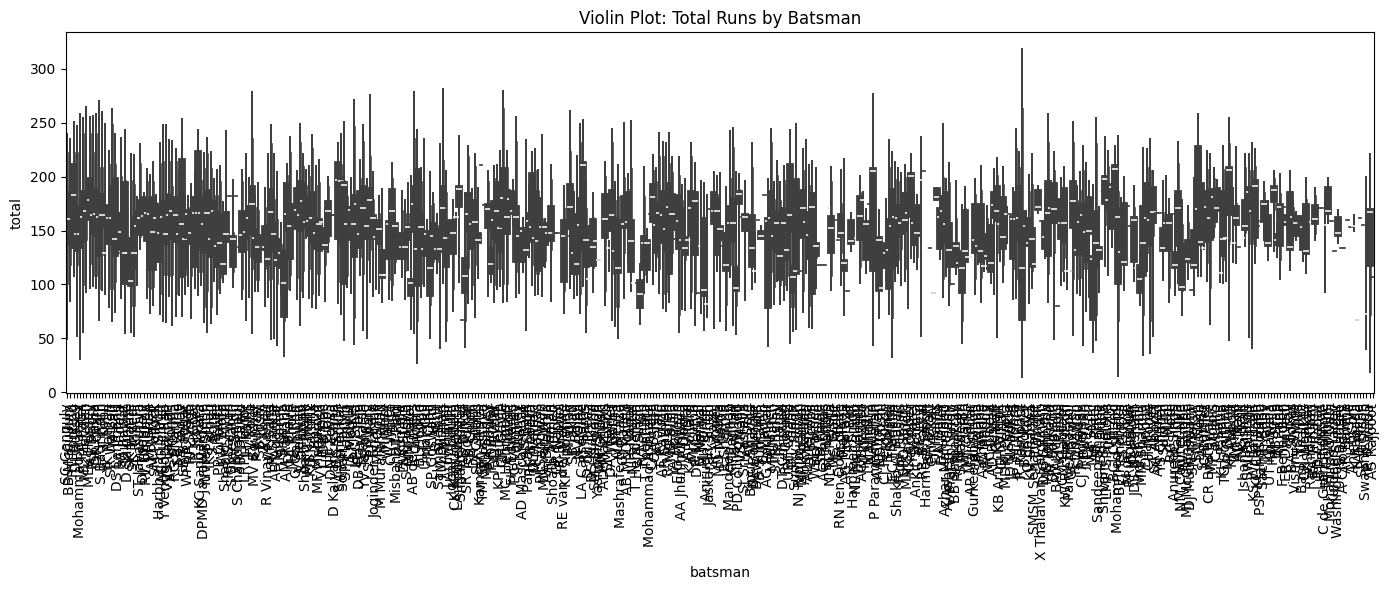

In [18]:
plt.figure(figsize=(14, 6))
sns.violinplot(data=df, x='batsman', y='total')
plt.title("Violin Plot: Total Runs by Batsman")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


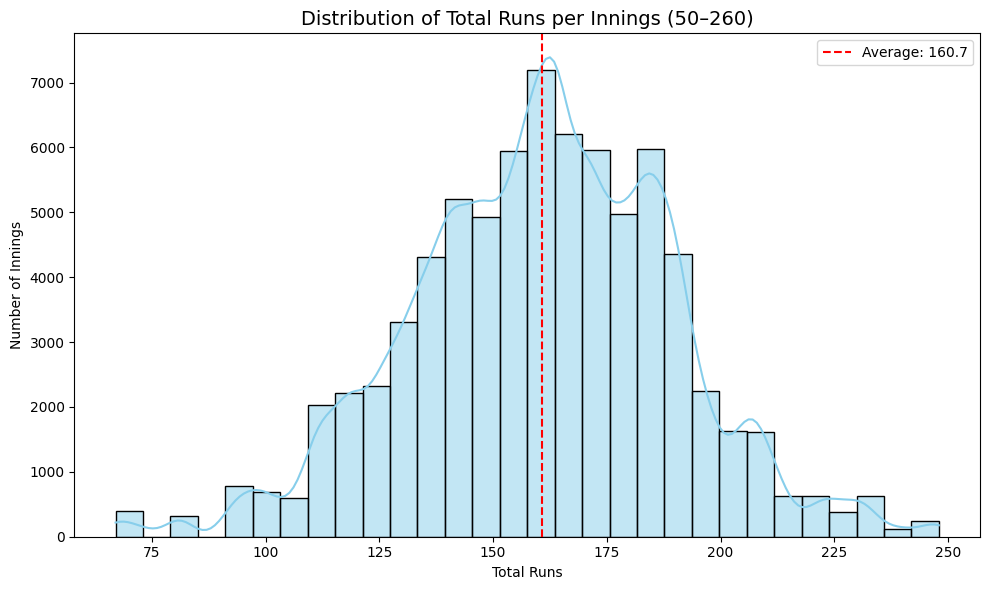

In [19]:
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional for inline plotting in Jupyter
%matplotlib inline

# ✅ Replace 'total' with the actual column name if different
# Filter runs between 50 and 260 for clean visualization
filtered_df = df[(df['total'] >= 50) & (df['total'] <= 260)]

# 📈 Create the distribution plot
plt.figure(figsize=(10, 6))
sns.histplot(filtered_df['total'], bins=30, kde=True, color='skyblue')

# ✍️ Add labels and title
plt.title('Distribution of Total Runs per Innings (50–260)', fontsize=14)
plt.xlabel('Total Runs')
plt.ylabel('Number of Innings')
plt.axvline(filtered_df['total'].mean(), color='red', linestyle='--', label=f"Average: {filtered_df['total'].mean():.1f}")
plt.legend()

plt.tight_layout()
plt.show()
